<a href="https://colab.research.google.com/github/stevemoseti/AITermProject18m01acs037/blob/main/SentimentAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Description : This is a sentiment analysis program for tweetd fetched from twitter using python

In [10]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# libs
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
n_words= set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud,STOPWORDS
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Twitter API credentils
consumerKey = "yoHpR3icFJyg0Xh8zdPjaLY0u"
consumerSecret = "2d0SWD4FyP0He4mCBTRDPnZPFMWlS9gwQKPuO3rqCC5DB2eoUO"
accessToken = "1298656739420708864-bRR10kyz4ydW07adxXOAiAxRVrowAa"
accessTokenSecret = "EGfUfGJJqw8hxnOBkQaShAhTjAEOnr2Cbqz7Lia6yW39a"

In [12]:
# create the authenthication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True, wait_on_rate_limit_notify=True)


In [13]:
# extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "IMDB", count = 100, lang="en", tweet_mode="extended" )
# print the last 5 tweets from the account
print ('show the 5 recent tweets: \n')
i=1
for tweet in posts[0:50]:
  print (str(i) + ')'+tweet.full_text +'\n')
  i = i+1

show the 5 recent tweets: 

1)The best of the best. 💛 @TroyKotsur @jes_chastain @ArianaDeBose #Oscars https://t.co/GybItMkhwV

2)Congratulations to all of tonight's #Oscars winners! 👏 See the full list of recipients 👉 https://t.co/KKjkmUIQt3 🏆✨ https://t.co/2ujkf6PRBL

3)The Power of the PJ. #Oscars https://t.co/fx3ML2QcVe

4)#CODA. That's it. That's the tweet. 😭❤️🤟 #Oscars  https://t.co/9owRaD9bk7 https://t.co/tOq4AOPcey

5)#CODA wins the #Oscar for Best Motion Picture of the Year, winning all 3 categories it was nominated for! Congratulations to the entire cast and crew 🎉 https://t.co/imnmkUEULt https://t.co/2GnPdwn2Nc

6)"For any of you out there who do, in fact, feel hopeless or alone, I just want you to know that you are unconditionally loved for the uniqueness that is you." 💛🥺 #Oscars @jes_chastain https://t.co/it56tH8CUI https://t.co/nh7yoyYUA3

7)Congratulations to #TheEyesOfTammyFaye star @jes_chastain for winning an #Oscar for Best Performance by an Actress in a Leading Role 

In [14]:
#create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
# show the first 50 rows of data
df.head()

,Tweets
0,The best of the best. 💛 @TroyKotsur @jes_chast...
1,Congratulations to all of tonight's #Oscars wi...
2,The Power of the PJ. #Oscars https://t.co/fx3M...
3,#CODA. That's it. That's the tweet. 😭❤️🤟 #Osca...
4,#CODA wins the #Oscar for Best Motion Picture ...


In [15]:
# Clean the text
# create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentions
  text = re.sub(r'#','',text) #removing the # symbol
  text =  re.sub(r'RT[\s]','',text) #remove RT
  text = re.sub(r'https?:\/\/\S+','', text) # remove teh hyper link

  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt) 
#show cleaned text
df


,Tweets
0,The best of the best. 💛 _chastain Oscars
1,Congratulations to all of tonight's Oscars win...
2,The Power of the PJ. Oscars
3,CODA. That's it. That's the tweet. 😭❤️🤟 Oscars
4,CODA wins the Oscar for Best Motion Picture of...
...,...
95,Which of these Oscar nominees do you think sho...
96,"Lina Wertmüller’s provocative, genre-defying f..."
97,'Everything Everywhere All at Once' star Miche...
98,New episode! 's is the most heartfelt and vul...


In [16]:
#stemming


#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    text = ''.join(text)
    return text
df['Tweets'] = df['Tweets'].apply(lambda text: stemming(text))
df


,Tweets
0,The best of the best. 💛 _chastain Oscars
1,Congratulations to all of tonight's Oscars win...
2,The Power of the PJ. Oscars
3,CODA. That's it. That's the tweet. 😭❤️🤟 Oscars
4,CODA wins the Oscar for Best Motion Picture of...
...,...
95,Which of these Oscar nominees do you think sho...
96,"Lina Wertmüller’s provocative, genre-defying f..."
97,'Everything Everywhere All at Once' star Miche...
98,New episode! 's is the most heartfelt and vul...


In [17]:
#lemmatization
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in words]
    text = ''.join(text)
    return text
df['Tweets'] = df['Tweets'].apply(lambda x: lemmatizing(x))
df

,Tweets
0,The best of the best. 💛 _chastain Oscars
1,Congratulations to all of tonight's Oscars win...
2,The Power of the PJ. Oscars
3,CODA. That's it. That's the tweet. 😭❤️🤟 Oscars
4,CODA wins the Oscar for Best Motion Picture of...
...,...
95,Which of these Oscar nominees do you think sho...
96,"Lina Wertmüller’s provocative, genre-defying f..."
97,'Everything Everywhere All at Once' star Miche...
98,New episode! 's is the most heartfelt and vul...


In [18]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

  #create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
 
 #create teh two new columns
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweets,subjectivity,Polarity
0,The best of the best. 💛 _chastain Oscars,0.300000,1.000000
1,Congratulations to all of tonight's Oscars win...,0.550000,0.350000
2,The Power of the PJ. Oscars,0.000000,0.000000
3,CODA. That's it. That's the tweet. 😭❤️🤟 Oscars,0.000000,0.000000
4,CODA wins the Oscar for Best Motion Picture of...,0.468750,0.481250
...,...,...,...
95,Which of these Oscar nominees do you think sho...,0.233333,0.600000
96,"Lina Wertmüller’s provocative, genre-defying f...",0.625000,0.437500
97,'Everything Everywhere All at Once' star Miche...,0.850000,0.256250
98,New episode! 's is the most heartfelt and vul...,0.670909,0.134091


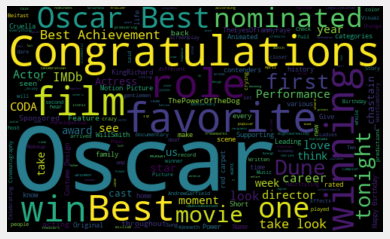

In [19]:
#plot the word cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [20]:
#create a function to compute the negative , neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the datafram
df

  

,Tweets,subjectivity,Polarity,Analysis
0,The best of the best. 💛 _chastain Oscars,0.300000,1.000000,Positive
1,Congratulations to all of tonight's Oscars win...,0.550000,0.350000,Positive
2,The Power of the PJ. Oscars,0.000000,0.000000,Neutral
3,CODA. That's it. That's the tweet. 😭❤️🤟 Oscars,0.000000,0.000000,Neutral
4,CODA wins the Oscar for Best Motion Picture of...,0.468750,0.481250,Positive
...,...,...,...,...
95,Which of these Oscar nominees do you think sho...,0.233333,0.600000,Positive
96,"Lina Wertmüller’s provocative, genre-defying f...",0.625000,0.437500,Positive
97,'Everything Everywhere All at Once' star Miche...,0.850000,0.256250,Positive
98,New episode! 's is the most heartfelt and vul...,0.670909,0.134091,Positive


In [21]:
#print all positive tweets
k=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== "Positive"):
    print(str(k)+')'+ sortedDF['Tweets'][i])
    print()
    k = k+1

1)The best of the best. 💛  _chastain  Oscars 

2)Congratulations to all of tonight's Oscars winners! 👏 See the full list of recipients 👉  🏆✨ 

3)CODA wins the Oscar for Best Motion Picture of the Year, winning all 3 categories it was nominated for! Congratulations to the entire cast and crew 🎉  

4)"For any of you out there who do, in fact, feel hopeless or alone, I just want you to know that you are unconditionally loved for the uniqueness that is you." 💛🥺 Oscars _chastain  

5)Congratulations to TheEyesOfTammyFaye star _chastain for winning an Oscar for Best Performance by an Actress in a Leading Role 🎉  

6)"Let's have peace and love and quiet." Preach, . Oscars 

7)Congratulations to Stephanie Ingram, Linda Dowds, and Justin Raleigh for winning the Oscar for Best Achievement in Makeup and Hairstyling! 🎉 TheEyesOfTammyFaye 

8)"I'm being called on in my life to love people. And protect people...I look like the crazy father, but love will make you do crazy things." - WillSmith on his

In [22]:
from posixpath import join
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== "Negative"):
    print(str(j)+')'+ sortedDF['Tweets'][i])
    print()
    j = j+1

1)Venus &amp; Serena Williams really said game, set, match. 👑 Oscars  

2)It's so hard to see someone else living your dream. Oscars AndrewGarfield JamieDornan  

3)Belfast writer-director Kenneth Branagh has broken an Oscar record being nominated 7 times in 7 different categories over the years. Academy Awards expert  joins IMDbIsObsessed this week to talk Oscar predictions and favorites 👉   

4)One of the most shocking things about  is 's ability to go from knitting to Elizabeth Holmes in .2 seconds. We caught up with the cast about life on set, and Amanda's unique motivation for the role. TheDropout   

5)With just one week left, we break down the snubs, surprises, trending stories, nominees, presenters, and everything else you need to know before the 2022 Oscars 

6)From 'The Piano' to ThePowerOfTheDog, we break down the cinematic trademarks of writer and director Jane Campion. 



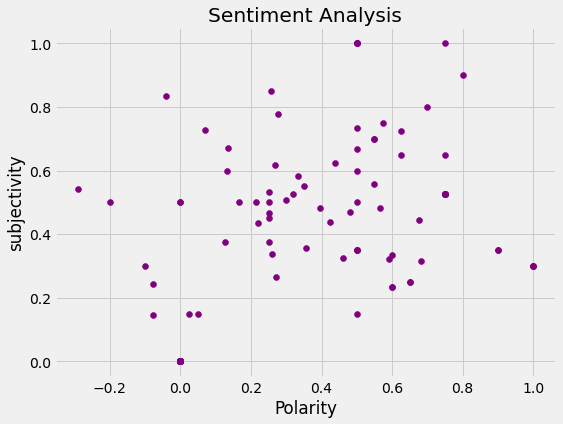

In [23]:
#plot the polartiy and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['subjectivity'][i],color='purple')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.show()


In [24]:
#GET the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0]) * 100,1)

72.0

In [25]:
#GET the percentage of Negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0]) * 100,1)

6.0

In [26]:
#GET the percentage of Neutral tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0]) * 100,1)

22.0

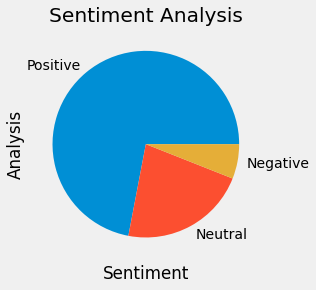

In [27]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts on a bie chart
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()


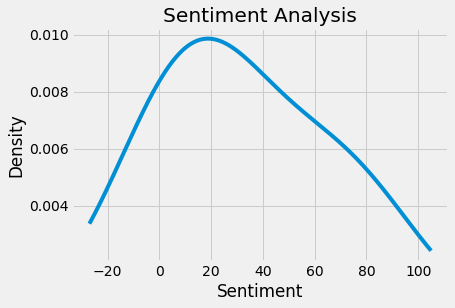

In [28]:
#plot and visualize the Table
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'kde')
plt.show()